In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split

In [20]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()

In [21]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [23]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * tf.random.normal(x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(x_test.shape)
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

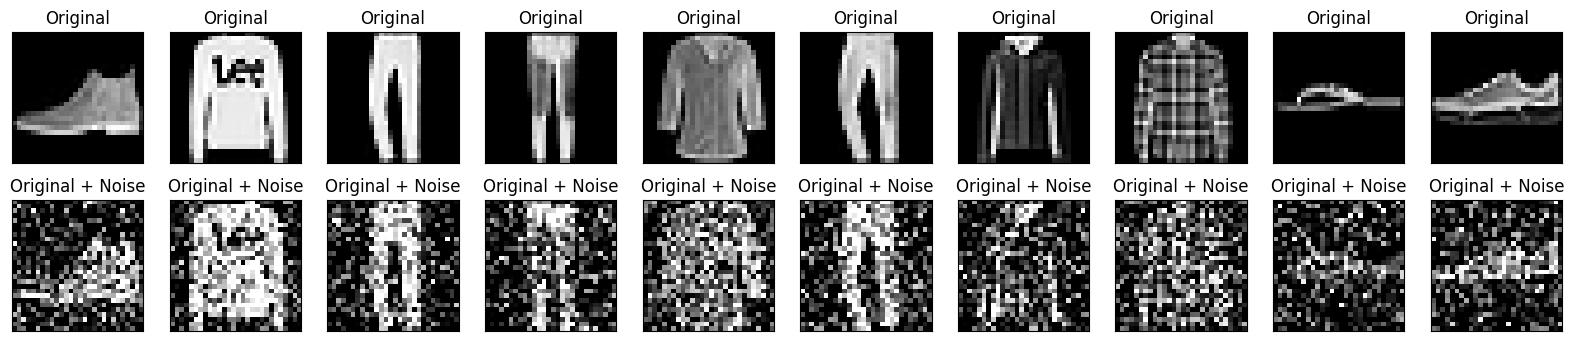

In [24]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(tf.squeeze(x_test[i]))
  plt.title('Original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.title('Original + Noise')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()


In [25]:
# Define the Autoencoder

In [26]:
class Denoise(Model):
  def __init__(self):
    super(Denoise,self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(16,(3,3),padding='same',strides=2,activation='relu'),
        layers.Conv2D(8,(3,3),padding='same',strides=2,activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(8,(3,3),strides=2,padding='same',activation='relu'),
        layers.Conv2DTranspose(16,(3,3),strides=2,padding='same',activation='relu'),
        layers.Conv2D(1,(3,3),padding='same',activation='sigmoid'),
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [27]:
model = Denoise()

In [28]:
# model.build(tf.keras.layers.Input((32,28,28,1)))
# model.summary()

In [29]:
model.compile(optimizer='adam',loss = losses.MeanSquaredError(),metrics=['accuracy'])

In [30]:
model.fit(x_train_noisy,x_train,epochs=10,validation_data=(x_test_noisy,x_test),shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0260 - accuracy: 0.5066 - val_loss: 0.0170 - val_accuracy: 0.5056
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0164 - accuracy: 0.5079 - val_loss: 0.0162 - val_accuracy: 0.5058
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0159 - accuracy: 0.5080 - val_loss: 0.0158 - val_accuracy: 0.5057
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0155 - accuracy: 0.5081 - val_loss: 0.0155 - val_accuracy: 0.5060
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0153 - accuracy: 0.5081 - val_loss: 0.0153 - val_accuracy: 0.5060
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0151 - accuracy: 0.5082 - val_loss: 0.0152 - val_accuracy: 0.5057
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0149 - accuracy: 0.5082 - val_loss: 0.0149 - val_accuracy

In [33]:
test_out =  model(x_test_noisy)

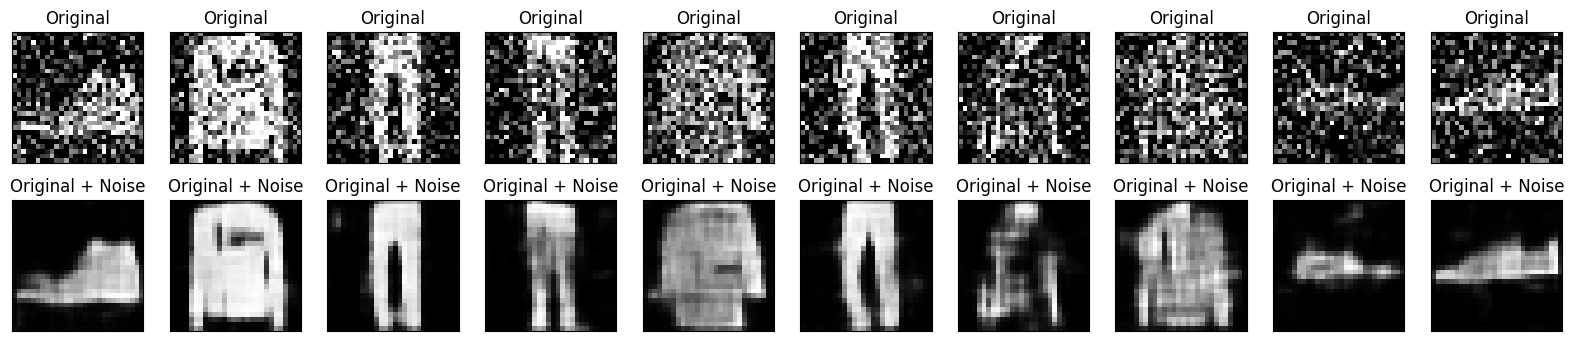

In [34]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.title('Original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(tf.squeeze(test_out[i]))
  plt.title('Original + Noise')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
